#                                   CRICKET SCORE PREDICTOR

### REQUIRED PACKAGES :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### GET THE DATA :

In [2]:
# Importing the dataset
df = pd.read_csv('ipl.csv')
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


### EXPLORATORY DATA ANALYSIS :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [4]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


### DATA PRE-PROCESSING :

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for each categorical column
label_encoders = {}

categorical_columns = ["date", "venue", "bat_team", "bowl_team", "batsman", "bowler"]

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [6]:
df.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,0,14,6,12,328,201,1,0,0.1,1,0,0,0,222
1,1,0,14,6,12,61,201,1,0,0.2,1,0,0,0,222
2,1,0,14,6,12,61,201,2,0,0.2,2,0,0,0,222
3,1,0,14,6,12,61,201,2,0,0.3,2,0,0,0,222
4,1,0,14,6,12,61,201,2,0,0.4,2,0,0,0,222
5,1,0,14,6,12,61,201,2,0,0.5,2,0,0,0,222
6,1,0,14,6,12,61,201,3,0,0.6,3,0,0,0,222
7,1,0,14,6,12,61,328,3,0,1.1,3,0,0,0,222
8,1,0,14,6,12,61,328,7,0,1.2,7,0,4,0,222
9,1,0,14,6,12,61,328,11,0,1.3,11,0,8,0,222


### CORRELATION MATRIX :

In [7]:
df.corr()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,0.999609,0.015417,0.238576,0.116078,-0.046604,-0.031768,0.026470,-0.055220,0.002487,0.045320,-0.031886,0.033432,0.049975,0.096586
date,0.999609,1.000000,0.014626,0.237338,0.116243,-0.046104,-0.032654,0.026948,-0.054618,0.002505,0.045803,-0.031359,0.033930,0.050051,0.097536
venue,0.015417,0.014626,1.000000,0.103630,0.071646,-0.027037,-0.033572,-0.017332,0.001760,0.001402,-0.021245,-0.000673,-0.011783,-0.024116,-0.036385
bat_team,0.238576,0.237338,0.103630,1.000000,-0.101522,-0.012580,-0.009857,-0.002888,-0.028283,0.001484,0.004459,-0.016499,0.016028,0.017426,0.031833
bowl_team,0.116078,0.116243,0.071646,-0.101522,1.000000,-0.031347,-0.010827,-0.006677,-0.006456,-0.002832,-0.011057,0.005044,-0.011303,0.000384,-0.048799
batsman,-0.046604,-0.046104,-0.027037,-0.012580,-0.031347,1.000000,0.011971,-0.024235,-0.026637,-0.030487,-0.005954,-0.006262,0.003607,0.002435,0.017128
bowler,-0.031768,-0.032654,-0.033572,-0.009857,-0.010827,0.011971,1.000000,-0.007129,0.003172,-0.001981,0.001554,0.007072,0.004425,-0.008047,-0.011267
runs,0.026470,0.026948,-0.017332,-0.002888,-0.006677,-0.024235,-0.007129,1.000000,0.591007,0.938154,0.750565,0.297768,0.594818,0.315422,0.254498
wickets,-0.055220,-0.054618,0.001760,-0.028283,-0.006456,-0.026637,0.003172,0.591007,1.000000,0.755240,0.242942,0.693740,0.019712,-0.171962,-0.337343
overs,0.002487,0.002505,0.001402,0.001484,-0.002832,-0.030487,-0.001981,0.938154,0.755240,1.000000,0.629374,0.382850,0.477508,0.236430,0.022282


### VISUALIZE THE DATA - to gain insights

<Axes: >

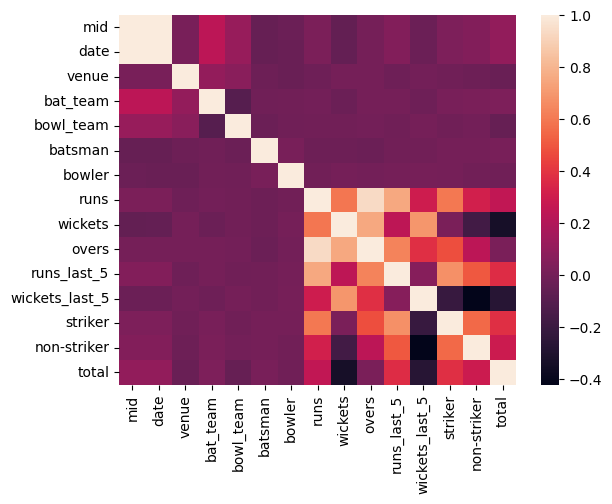

In [8]:
sns.heatmap(df.corr())

### Prepare the data for Machine Learning algorithms

In [9]:
X = df.iloc[:,[7,8,9,12,13]].values
Y = df.iloc[:, 14].values

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 12345)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### MODEL BUILDING :

In [12]:
def build_lr_model():
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train,y_train)
    return model

In [13]:
def build_lg_model():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train,y_train)
    return model

In [14]:
def build_knn_model():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=9)
    model.fit(x_train, y_train)
    return model

In [15]:
def build_nb_model():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()    
    model.fit(x_train, y_train)
    return model

In [16]:
def build_svm_model():
    from sklearn.svm import SVC
    model = SVC()
    model.fit(x_train, y_train)
    return model

In [17]:
def build_dt_model():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    return model

In [18]:
def build_rf_model():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100)
    model.fit(x_train, y_train)
    return model

In [19]:
def build_cb_model():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier()
    model.fit(x_train, y_train)
    return model

In [20]:
def build_xgb_model():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    return model

### MODEL EVALUATION

In [21]:
def evaluate_model(model):
    y_true = y_test
    y_pred = model.predict(x_test)
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = f"{accuracy_score(y_true,y_pred):.2f}"
    precision = f"{precision_score(y_true,y_pred):.2f}"
    recall = f"{recall_score(y_true,y_pred):.2f}"
    f1 = f"{f1_score(y_true,y_pred):.2f}"

    return accuracy, precision, recall, f1

### MODEL BUILDING :

In [22]:
model_lr = build_lr_model()
model_lr

LinearRegression()

In [23]:
model_knn = build_knn_model()
model_knn

KNeighborsClassifier(n_neighbors=9)

In [24]:
model_rf = build_rf_model()
model_rf

RandomForestClassifier()

In [25]:
model_dt = build_dt_model()
model_dt

DecisionTreeClassifier()

### MODEL EVALUATION :

In [26]:
y_pred = model_lr.predict(x_test)
score = model_lr.score(x_test,y_test)*100
print("R square value:" , score)

R square value: 50.34495767063005


In [27]:
y_pred = model_knn.predict(x_test)
score = model_knn.score(x_test,y_test)*100
print("R square value:" , score)

R square value: 40.21258682382656


In [28]:
y_pred = model_rf.predict(x_test)
score = model_rf.score(x_test,y_test)*100
print("R square value:" , score)

R square value: 63.51820669332772


In [29]:
y_pred = model_dt.predict(x_test)
score = model_dt.score(x_test,y_test)*100
print("R square value:" , score)

R square value: 51.862765733529784


### Testing with a custom input

In [30]:
### input - (runs ,wickets, overs, striker_runs, Non-stricker_runs )

new_prediction = model_dt.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

Prediction score: [178]


### SAVE THE MODEL :

In [31]:
with open('./IPL_SCORE_lr_model.pkl', 'wb') as file:
    pickle.dump(model_lr, file)

In [32]:
with open('./IPL_SCORE_knn_model.pkl', 'wb') as file:
    pickle.dump(model_knn, file)

In [33]:
with open('./IPL_SCORE_dt_model.pkl', 'wb') as file:
    pickle.dump(model_dt, file)